In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import tqdm
import numpy as np
import sys
sys.path.append('../my_funcs/')
from pipeline_main import pipeline
from pipeline_stress import massflux


# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}
mpl.rc('font', **font)

In [2]:
data = pipeline(snap = 357, run = 'my_core_13lacc', sink_id=13)
data.recalc_L(verbose = 1); 
data.calc_disksize(plot = False); data.calc_trans_xyz()

Initialising patch data


100%|██████████| 4165/4165 [00:03<00:00, 1235.73it/s]


Converged mean angular momentum vector after 0 iteration(s)
Looping through patches, assigning azimuthal velocities to all cells and extracing them within given cylindrical coordiantes


100%|██████████| 4165/4165 [00:00<00:00, 8869.20it/s] 


Disk size: 17.9 au
Transforming old z-coordinate into mean angular momentum vector


100%|██████████| 4165/4165 [00:00<00:00, 5007.61it/s]


Using 783 patches to retrive mass flux
Calculating radial part
Radial 2D histogram not completely covered
Calculating vertical part
Vertical (top) 2D histogram not completely covered
Vertical (bottom) 2D histogram not completely covered
Calculating vertical part
Returns total accretion rate in radial and vertical direction resp.
Unit: [g/s]


array([ 2.57560462e+20, -1.19505094e+19])

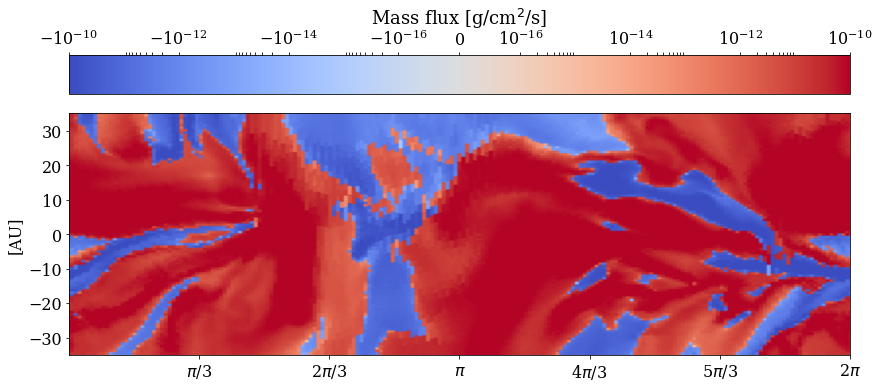

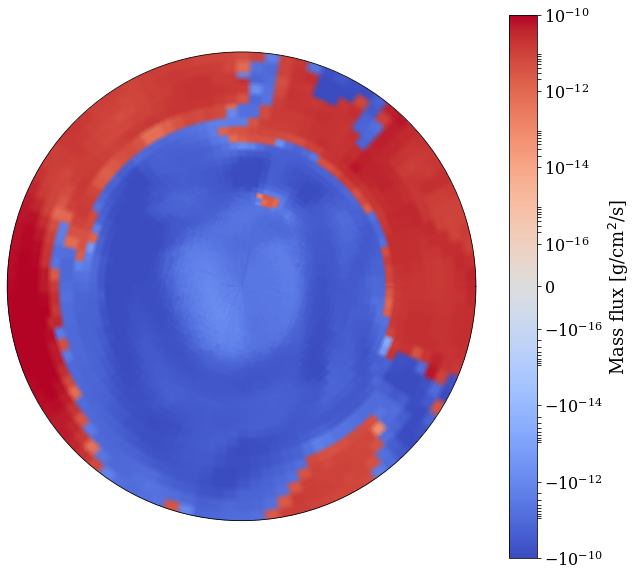

In [10]:
data.massflux(radius=35, plot = True)

In [4]:
radii = np.logspace(np.log10(5), np.log10(1000), 50)#np.array([20, 50, 100, 250, 500, 1000])
radial_part = np.zeros((len(radii)))
vertical_part = np.zeros((len(radii)))

In [5]:
# Takes 2m 18s for 50 radii
for i in tqdm.tqdm(range(len(radii))):
    radial_part[i], vertical_part[i] = data.massflux(radius = radii[i], plot = False, verbose = 0)

100%|██████████| 50/50 [00:34<00:00,  1.45it/s]


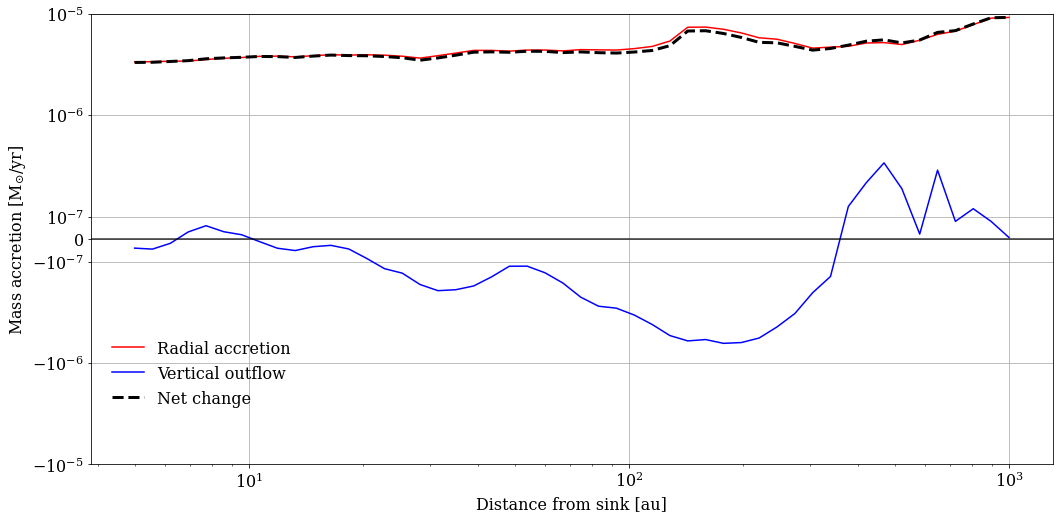

In [12]:
fig, axs = plt.subplots(figsize = (12*1.25, 6*1.25))
axs.grid('--')

unit_conv = data.sn.cgs.m_sun**(-1) * data.sn.cgs.yr

axs.plot(radii, radial_part * unit_conv, label = 'Radial accretion', color = 'red')
axs.plot(radii, vertical_part * unit_conv, label = 'Vertical outflow', color = 'blue')
axs.plot(radii, (vertical_part + radial_part) * unit_conv, lw = 3, color = 'black', label = 'Net change', ls = '--')

axs.axhline(0, color = 'black', alpha = 0.8)


axs.set_yscale('symlog', linthresh=1e-7, linscale=0.2); axs.set_xscale('log')
axs.set(ylabel = 'Mass accretion [M$_{\odot}$/yr]', xlabel = 'Distance from sink [au]', ylim = (-1e-5,1e-5))
fig.legend(frameon = False, loc = 'lower left', bbox_to_anchor=(0.1, 0.2))

plt.tight_layout()

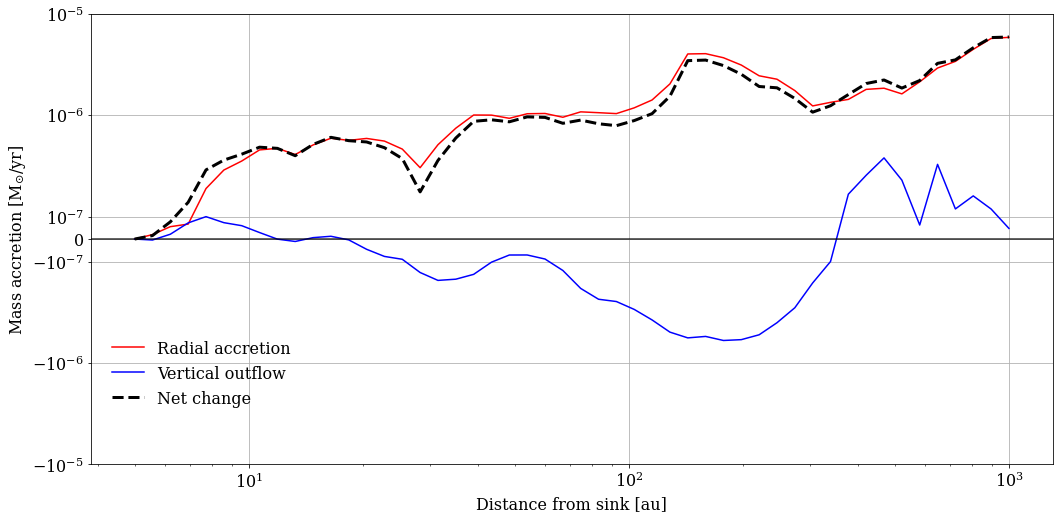

In [13]:
fig, axs = plt.subplots(figsize = (12*1.25, 6*1.25))
axs.grid('--')

unit_conv = data.sn.cgs.m_sun**(-1) * data.sn.cgs.yr

axs.plot(radii, (radial_part - radial_part[0]) * unit_conv, label = 'Radial accretion', color = 'red')
axs.plot(radii, (vertical_part - vertical_part[0]) * unit_conv, label = 'Vertical outflow', color = 'blue')
axs.plot(radii, (vertical_part + radial_part - (vertical_part[0] + radial_part[0])) * unit_conv, lw = 3, color = 'black', label = 'Net change', ls = '--')

axs.axhline(0, color = 'black', alpha = 0.8)


axs.set_yscale('symlog', linthresh=1e-7, linscale=0.2); axs.set_xscale('log')
axs.set(ylabel = 'Mass accretion [M$_{\odot}$/yr]', xlabel = 'Distance from sink [au]', ylim = (-1e-5,1e-5))
fig.legend(frameon = False, loc = 'lower left', bbox_to_anchor=(0.1, 0.2))

plt.tight_layout()